# Library

In [156]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Data

## Define Stock Ticker and Date Range

In [157]:
ticker = "AAPL" 
start_date = "2020-01-01"
end_date = "2023-12-31"

## Fetch Data

In [158]:
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed

## Create CSV

In [159]:
data.to_csv("stock_data.csv")

In [160]:
df = pd.read_csv('stock_data.csv', sep=',')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.796028,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.088287,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.662704,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.320969,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.484352,132079200
...,...,...,...,...,...,...,...
1001,2023-12-22,195.179993,195.410004,192.970001,193.600006,192.656174,37122800
1002,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.108871,28919300
1003,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.208359,48087700
1004,2023-12-28,194.139999,194.660004,193.169998,193.580002,192.636276,34049900


# Data Processing

In [161]:
df['Date'] = pd.to_datetime(df['Date'])

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1006 non-null   datetime64[ns]
 1   Open       1006 non-null   float64       
 2   High       1006 non-null   float64       
 3   Low        1006 non-null   float64       
 4   Close      1006 non-null   float64       
 5   Adj Close  1006 non-null   float64       
 6   Volume     1006 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.1 KB


In [163]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [164]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1006,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,2021-12-30 11:57:08.230616320,140.675507,142.321389,139.143536,140.808131,138.711616,9.895211e+07
min,2020-01-02 00:00:00,57.020000,57.125000,53.152500,56.092499,54.509750,2.404830e+07
25%,2020-12-30 06:00:00,123.682503,125.030003,122.157499,123.592501,121.054726,6.407675e+07
50%,2021-12-29 12:00:00,145.540001,147.264999,144.120003,145.860001,143.596535,8.467540e+07
75%,2022-12-28 18:00:00,166.302498,168.147503,164.815002,166.214996,164.086544,1.155069e+08
max,2023-12-29 00:00:00,198.020004,199.619995,197.000000,198.110001,197.144180,4.265100e+08
std,NaN,33.310018,33.430571,33.179199,33.313857,33.540053,5.439653e+07


# Exploratory Data Analysis

In [165]:
df_copy = df.copy()

In [166]:
columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

## Data Distribution and Box Plot

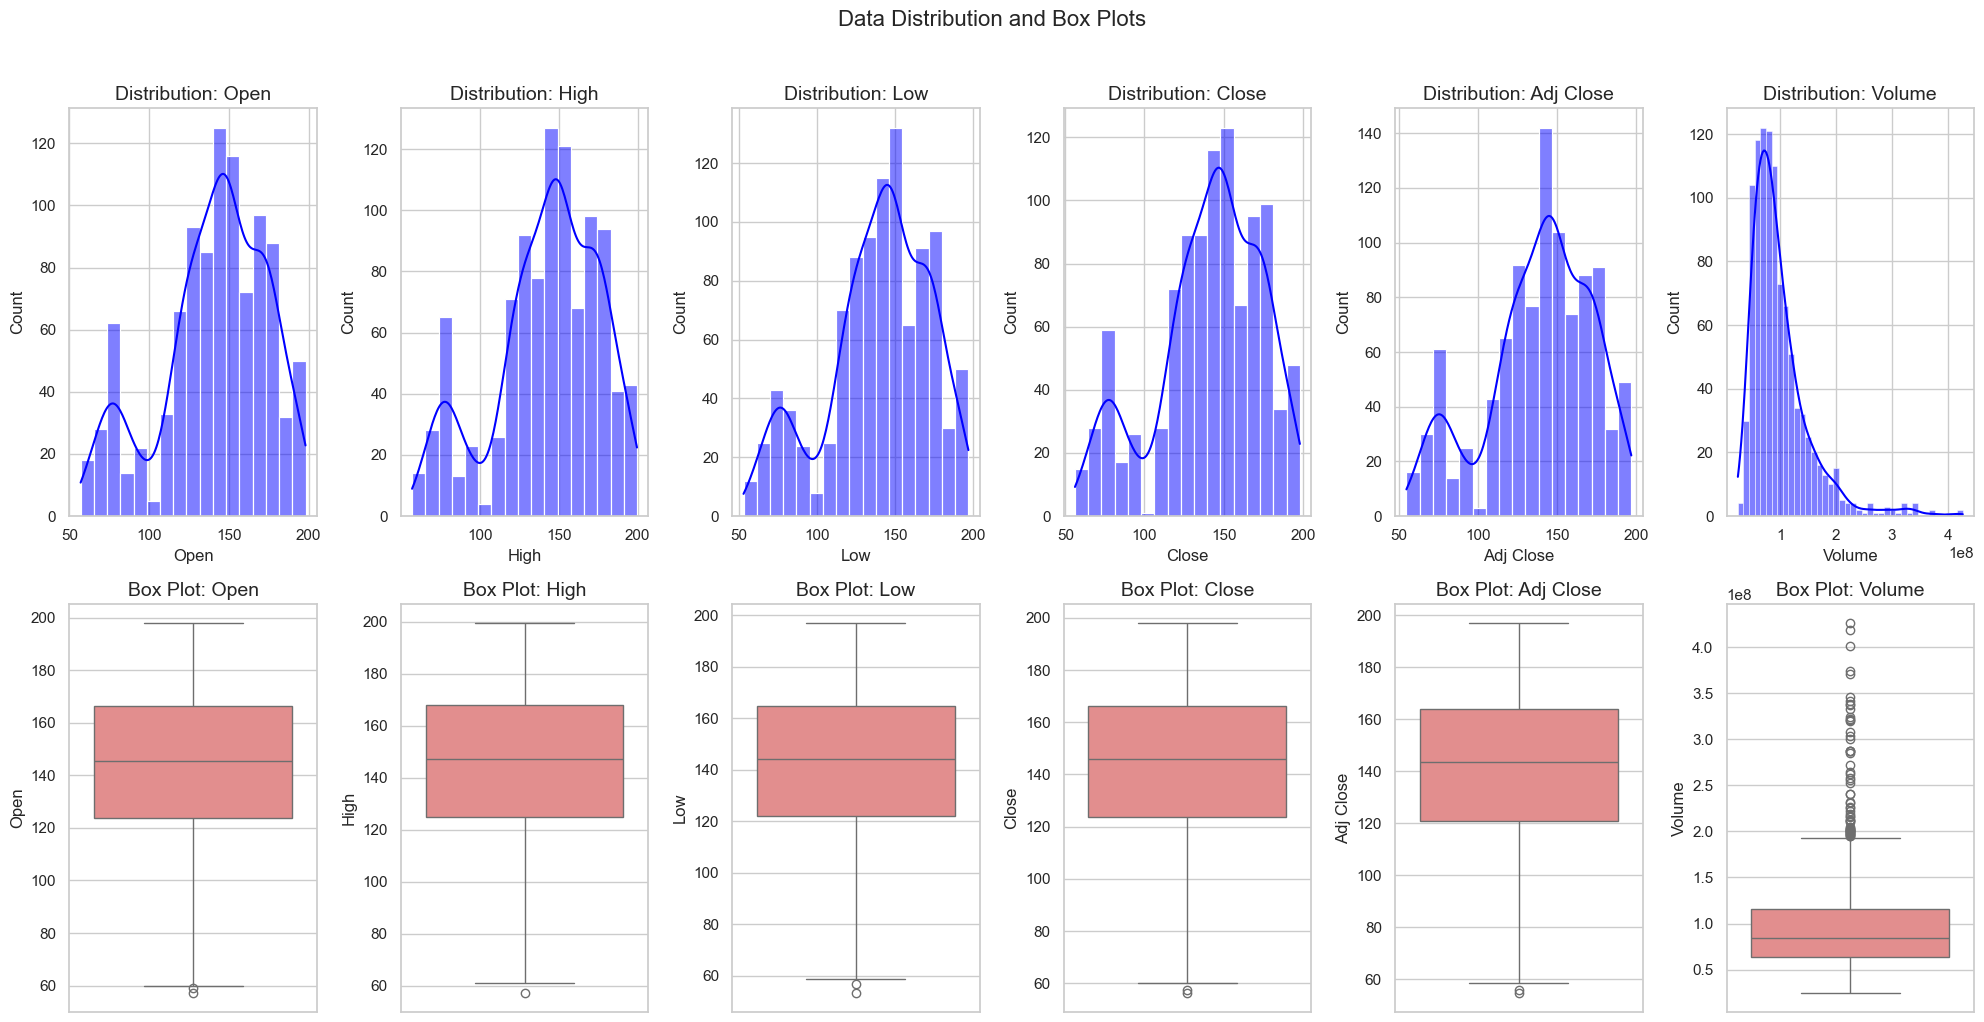

In [167]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=len(columns), figsize=(20, 10))
fig.suptitle("Data Distribution and Box Plots", fontsize=16, y=1.02)

for i, col in enumerate(columns):
    # Distribution Plot
    sns.histplot(df_copy[col], kde=True, ax=axes[0, i], color="blue")
    axes[0, i].set_title(f"Distribution: {col}", fontsize=14)
    
    # Box Plot
    sns.boxplot(y=df_copy[col], ax=axes[1, i], color="lightcoral")
    axes[1, i].set_title(f"Box Plot: {col}", fontsize=14)

plt.tight_layout()
plt.show()

## Stock Data Over Time

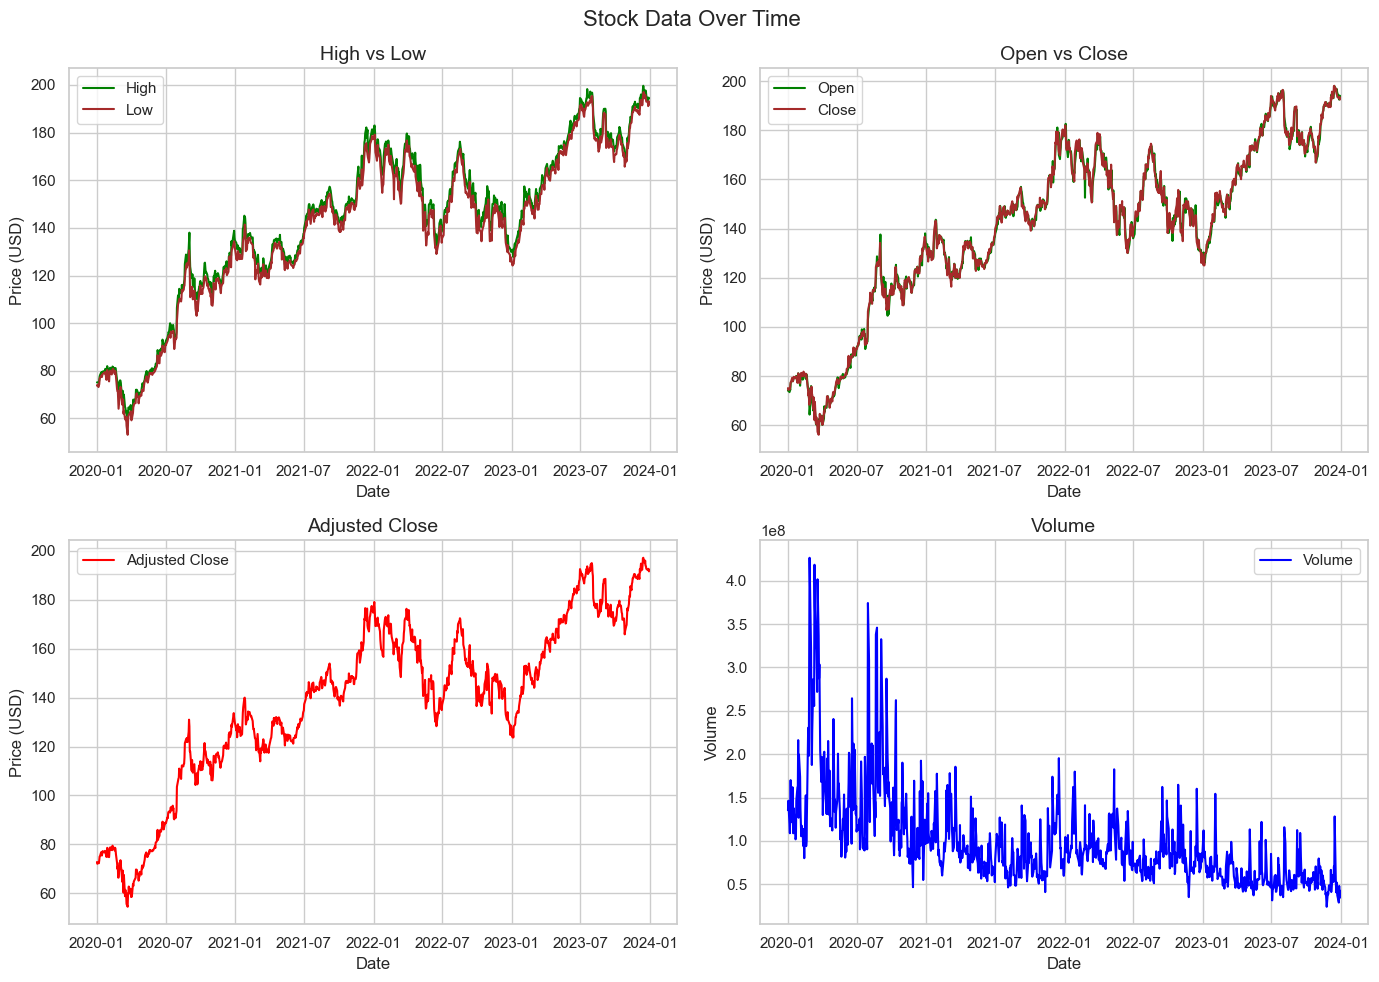

In [168]:
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Stock Data Over Time', fontsize=16)

# 1. High vs Low
axes[0, 0].plot(df_copy['Date'], df_copy['High'], color='green', label='High')
axes[0, 0].plot(df_copy['Date'], df_copy['Low'], color='brown', label='Low')
axes[0, 0].set_title('High vs Low', fontsize=14)
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Price (USD)', fontsize=12)
axes[0, 0].legend()

# 2. Open vs Close
axes[0, 1].plot(df_copy['Date'], df_copy['Open'], color='green', label='Open')
axes[0, 1].plot(df_copy['Date'], df_copy['Close'], color='brown', label='Close')
axes[0, 1].set_title('Open vs Close', fontsize=14)
axes[0, 1].set_xlabel('Date', fontsize=12)
axes[0, 1].set_ylabel('Price (USD)', fontsize=12)
axes[0, 1].legend()

# 3. Adjusted Close
axes[1, 0].plot(df_copy['Date'], df_copy['Adj Close'], color='red', label='Adjusted Close')
axes[1, 0].set_title('Adjusted Close', fontsize=14)
axes[1, 0].set_xlabel('Date', fontsize=12)
axes[1, 0].set_ylabel('Price (USD)', fontsize=12)
axes[1, 0].legend()

# 4. Volume
axes[1, 1].plot(df_copy['Date'], df_copy['Volume'], color='blue', label='Volume')
axes[1, 1].set_title('Volume', fontsize=14)
axes[1, 1].set_xlabel('Date', fontsize=12)
axes[1, 1].set_ylabel('Volume', fontsize=12)
axes[1, 1].legend()

# Adjust layout for better display
plt.tight_layout()
plt.show()

# Data Spliting

In [169]:
X = df['Date']
y_open = df['Open']             # Open price as the target
y_close = df['Close']           # Close price as the target
y_high = df['High']             # High price as the target
y_low = df['Low']               # Low price as the target
y_adjclose = df['Adj Close']    # Adj Close price as the target
y_volume = df['Volume']         # Volume as the target

In [170]:
X

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
1001   2023-12-22
1002   2023-12-26
1003   2023-12-27
1004   2023-12-28
1005   2023-12-29
Name: Date, Length: 1006, dtype: datetime64[ns]

In [171]:
X = X.astype(np.int64)

In [172]:
X

0       1577923200000000000
1       1578009600000000000
2       1578268800000000000
3       1578355200000000000
4       1578441600000000000
               ...         
1001    1703203200000000000
1002    1703548800000000000
1003    1703635200000000000
1004    1703721600000000000
1005    1703808000000000000
Name: Date, Length: 1006, dtype: int64

# Data Engineering

In [173]:
scaler = MinMaxScaler()
X = scaler.fit_transform(np.array(X).reshape(-1, 1))

y_open = scaler.fit_transform(np.array(y_open).reshape(-1, 1))
y_close = scaler.fit_transform(np.array(y_close).reshape(-1, 1))
y_high = scaler.fit_transform(np.array(y_high).reshape(-1, 1))
y_low = scaler.fit_transform(np.array(y_low).reshape(-1, 1))
y_adjclose = scaler.fit_transform(np.array(y_adjclose).reshape(-1, 1))
y_volume = scaler.fit_transform(np.array(y_volume).reshape(-1, 1))

# Train-Test Data Split

In [174]:
X_train, X_test, y_train_open, y_test_open = train_test_split(X, y_open, test_size=0.2, random_state=42)
_, _, y_train_close, y_test_close = train_test_split(X, y_close, test_size=0.2, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(X, y_high, test_size=0.2, random_state=42)
_, _, y_train_low, y_test_low = train_test_split(X, y_low, test_size=0.2, random_state=42)
_, _, y_train_adjclose, y_test_adjclose = train_test_split(X, y_adjclose, test_size=0.2, random_state=42)
_, _, y_train_volume, y_test_volume = train_test_split(X, y_volume, test_size=0.2, random_state=42)

# Model Training

In [175]:
# Polynomial Regression Model
poly = PolynomialFeatures(degree=2)  # You can adjust the degree of the polynomial
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the model for predicting Open price
model_open = LinearRegression()
model_open.fit(X_poly_train, y_train_open)

# Train the model for predicting Close price
model_close = LinearRegression()
model_close.fit(X_poly_train, y_train_close)

# Train the model for predicting High price
model_high = LinearRegression()
model_high.fit(X_poly_train, y_train_high)

# Train the model for predicting Low price
model_low = LinearRegression()
model_low.fit(X_poly_train, y_train_low)

# Train the model for predicting Adj Close price
model_adjclose = LinearRegression()
model_adjclose.fit(X_poly_train, y_train_adjclose)

# Train the model for predicting Volume
model_volume = LinearRegression()
model_volume.fit(X_poly_train, y_train_volume)

LinearRegression()

# Prediction

In [176]:
open_price_pred = model_open.predict(poly.transform(X_train))
close_price_pred = model_close.predict(poly.transform(X_train))
high_price_pred = model_high.predict(poly.transform(X_train))
low_price_pred = model_low.predict(poly.transform(X_train))
adjclose_price_pred = model_adjclose.predict(poly.transform(X_train))
volume_pred = model_volume.predict(poly.transform(X_train))

# Model Evaluation

In [177]:
# Calculate evaluation metrics for Open Price
mae_open = mean_absolute_error(y_train_open, open_price_pred)
mse_open = mean_squared_error(y_train_open, open_price_pred)
rmse_open = np.sqrt(mse_open)
r2_open = r2_score(y_train_open, open_price_pred)

# Calculate evaluation metrics for Close Price
mae_close = mean_absolute_error(y_train_close, close_price_pred)
mse_close = mean_squared_error(y_train_close, close_price_pred)
rmse_close = np.sqrt(mse_close)
r2_close = r2_score(y_train_close, close_price_pred)

# Calculate evaluation metrics for High Price
mae_high = mean_absolute_error(y_train_high, high_price_pred)
mse_high = mean_squared_error(y_train_high, high_price_pred)
rmse_high = np.sqrt(mse_high)
r2_high = r2_score(y_train_high, high_price_pred)

# Calculate evaluation metrics for Low Price
mae_low = mean_absolute_error(y_train_low, low_price_pred)
mse_low = mean_squared_error(y_train_low, low_price_pred)
rmse_low = np.sqrt(mse_low)
r2_low = r2_score(y_train_low, low_price_pred)

# Calculate evaluation metrics for Adj Close Price
mae_adjclose = mean_absolute_error(y_train_adjclose, adjclose_price_pred)
mse_adjclose = mean_squared_error(y_train_adjclose, adjclose_price_pred)
rmse_adjclose = np.sqrt(mse_adjclose)
r2_adjclose = r2_score(y_train_adjclose, adjclose_price_pred)

# Calculate evaluation metrics for Volume
mae_volume = mean_absolute_error(y_train_volume, volume_pred)
mse_volume = mean_squared_error(y_train_volume, volume_pred)
rmse_volume = np.sqrt(mse_volume)
r2_volume = r2_score(y_train_volume, volume_pred)

# Display the evaluation results
print(f"Open Price - MAE: {mae_open}, MSE: {mse_open}, RMSE: {rmse_open}, R²: {r2_open}")
print(f"Close Price - MAE: {mae_close}, MSE: {mse_close}, RMSE: {rmse_close}, R²: {r2_close}")
print(f"High Price - MAE: {mae_high}, MSE: {mse_high}, RMSE: {rmse_high}, R²: {r2_high}")
print(f"Low Price - MAE: {mae_low}, MSE: {mse_low}, RMSE: {rmse_low}, R²: {r2_low}")
print(f"Adj Close Price - MAE: {mae_adjclose}, MSE: {mse_adjclose}, RMSE: {rmse_adjclose}, R²: {r2_adjclose}")
print(f"Volume - MAE: {mae_volume}, MSE: {mse_volume}, RMSE: {rmse_volume}, R²: {r2_volume}")

Open Price - MAE: 0.08180227664542719, MSE: 0.010333454531839145, RMSE: 0.10165360068309998, R²: 0.8152867407796959
Close Price - MAE: 0.08037292884929141, MSE: 0.00996861505021834, RMSE: 0.09984295193061121, R²: 0.8189949499033409
High Price - MAE: 0.08027565206324587, MSE: 0.009932346938867992, RMSE: 0.09966116063375939, R²: 0.8197864281369254
Low Price - MAE: 0.0798259091212399, MSE: 0.009811895346205362, RMSE: 0.09905501171674941, R²: 0.8160136557794851
Adj Close Price - MAE: 0.07874141408938579, MSE: 0.009584550558666825, RMSE: 0.09790071786594226, R²: 0.8269478057404138
Volume - MAE: 0.06740499868613425, MSE: 0.009851987313971754, RMSE: 0.09925717764460036, R²: 0.46188426073552313


# Actual vs Predicted Values For Each Feature

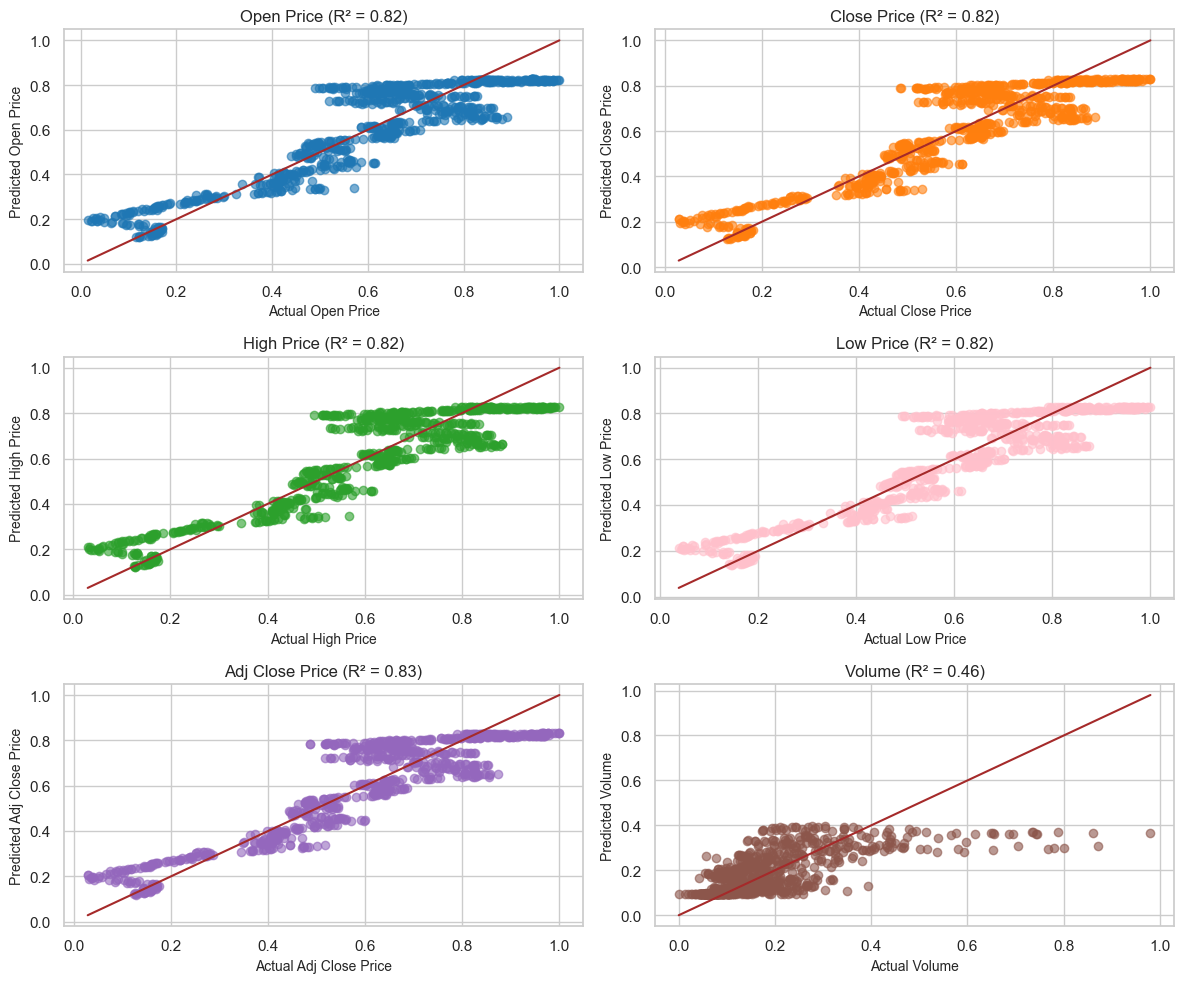

In [178]:
y_actual_open = y_train_open  # Actual Open prices
y_predicted_open = open_price_pred  # Predicted Open prices

y_actual_close = y_train_close  # Actual Close prices
y_predicted_close = close_price_pred  # Predicted Close prices

y_actual_high = y_train_high  # Actual High prices
y_predicted_high = high_price_pred  # Predicted High prices

y_actual_low = y_train_low  # Actual Low prices
y_predicted_low = low_price_pred  # Predicted Low prices

y_actual_adjclose = y_train_adjclose  # Actual Adj Close prices
y_predicted_adjclose = adjclose_price_pred  # Predicted Adj Close prices

y_actual_volume = y_train_volume  # Actual Volume
y_predicted_volume = volume_pred  # Predicted Volume

# Calculate R² for each feature
r2_open = r2_score(y_actual_open, y_predicted_open)
r2_close = r2_score(y_actual_close, y_predicted_close)
r2_high = r2_score(y_actual_high, y_predicted_high)
r2_low = r2_score(y_actual_low, y_predicted_low)
r2_adjclose = r2_score(y_actual_adjclose, y_predicted_adjclose)
r2_volume = r2_score(y_actual_volume, y_predicted_volume)

# Create the figure for plotting
plt.figure(figsize=(12, 10))

# Scatter plot for each feature with actual vs predicted values
plt.subplot(3, 2, 1)
plt.scatter(y_actual_open, y_predicted_open, color='#1f77b4', alpha=0.6)  
plt.plot([min(y_actual_open), max(y_actual_open)], [min(y_actual_open), max(y_actual_open)], color='brown', linestyle='-')
plt.title(f'Open Price (R² = {r2_open:.2f})', fontsize=12)
plt.xlabel('Actual Open Price', fontsize=10)
plt.ylabel('Predicted Open Price', fontsize=10)

plt.subplot(3, 2, 2)
plt.scatter(y_actual_close, y_predicted_close, color='#ff7f0e', alpha=0.6)  
plt.plot([min(y_actual_close), max(y_actual_close)], [min(y_actual_close), max(y_actual_close)], color='brown', linestyle='-')
plt.title(f'Close Price (R² = {r2_close:.2f})', fontsize=12)
plt.xlabel('Actual Close Price', fontsize=10)
plt.ylabel('Predicted Close Price', fontsize=10)

plt.subplot(3, 2, 3)
plt.scatter(y_actual_high, y_predicted_high, color='#2ca02c', alpha=0.6)  
plt.plot([min(y_actual_high), max(y_actual_high)], [min(y_actual_high), max(y_actual_high)], color='brown', linestyle='-')
plt.title(f'High Price (R² = {r2_high:.2f})', fontsize=12)
plt.xlabel('Actual High Price', fontsize=10)
plt.ylabel('Predicted High Price', fontsize=10)

plt.subplot(3, 2, 4)
plt.scatter(y_actual_low, y_predicted_low, color='#FFC0CB', alpha=0.6)  
plt.plot([min(y_actual_low), max(y_actual_low)], [min(y_actual_low), max(y_actual_low)], color='brown', linestyle='-')
plt.title(f'Low Price (R² = {r2_low:.2f})', fontsize=12)
plt.xlabel('Actual Low Price', fontsize=10)
plt.ylabel('Predicted Low Price', fontsize=10)

plt.subplot(3, 2, 5)
plt.scatter(y_actual_adjclose, y_predicted_adjclose, color='#9467bd', alpha=0.6)  
plt.plot([min(y_actual_adjclose), max(y_actual_adjclose)], [min(y_actual_adjclose), max(y_actual_adjclose)], color='brown', linestyle='-')
plt.title(f'Adj Close Price (R² = {r2_adjclose:.2f})', fontsize=12)
plt.xlabel('Actual Adj Close Price', fontsize=10)
plt.ylabel('Predicted Adj Close Price', fontsize=10)

plt.subplot(3, 2, 6)
plt.scatter(y_actual_volume, y_predicted_volume, color='#8c564b', alpha=0.6)  
plt.plot([min(y_actual_volume), max(y_actual_volume)], [min(y_actual_volume), max(y_actual_volume)], color='brown', linestyle='-')
plt.title(f'Volume (R² = {r2_volume:.2f})', fontsize=12)
plt.xlabel('Actual Volume', fontsize=10)
plt.ylabel('Predicted Volume', fontsize=10)

# Adjust layout for tight spacing
plt.tight_layout()
plt.show()